<a href="https://colab.research.google.com/github/delToros/Data_science_fatal_force/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [5]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [190]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# This might be helpful:
from collections import Counter

## Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [8]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [10]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [11]:
df_hh_income.describe()

,Geographic Area,City,Median Income
count,29322,29322,29271
unique,51,24249,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [12]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [13]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [14]:
df_pct_poverty.poverty_rate.replace('-', 0, inplace=True)
df_pct_poverty = df_pct_poverty.astype({'poverty_rate':'float'})


In [15]:
df_pct_poverty.describe()

,poverty_rate
count,"29,329.00"
mean,16.33
std,13.20
min,0.00
25%,7.00
50%,13.60
75%,22.40
max,100.00


In [16]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [17]:
df_pct_completed_hs.percent_completed_hs.replace('-', 0, inplace=True)
df_pct_completed_hs = df_pct_completed_hs.astype({'percent_completed_hs':'float'})

In [18]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [19]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [20]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [21]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [23]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [24]:
df_hh_income[df_hh_income['Median Income'].isnull()]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [25]:
df_hh_income.fillna(0, inplace=True)

In [26]:
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [27]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [28]:
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [29]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [30]:
df_fatalities[df_fatalities.armed.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,NaN,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,NaN,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,NaN,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,NaN,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,NaN,43.00,M,NaN,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,NaN,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [31]:
df_hh_income.duplicated().any()

False

In [32]:
df_pct_completed_hs.duplicated().any()

False

In [33]:
df_pct_poverty.duplicated().any()

False

In [34]:
df_share_race_city.duplicated().any()

False

In [35]:
df_fatalities.duplicated().any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [36]:
df_pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate':'mean'})
df_pct_poverty_by_state.sort_values('poverty_rate', ascending = False, inplace=True)

In [37]:
df_pct_poverty_by_state_bar = px.bar(
    df_pct_poverty_by_state,
    x='Geographic Area',
    y='poverty_rate',
    title = 'Average poverty rate by state',
    color = 'poverty_rate',
    color_continuous_scale = 'bupu'
)

df_pct_poverty_by_state_bar.update_layout(
    xaxis_title = 'States',
    yaxis_title = 'Avr poverty rate'
)
df_pct_poverty_by_state_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [38]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00
29325,WY,Worland city,85.60
29326,WY,Wright town,89.20
29327,WY,Yoder town,79.40


In [39]:
df_pct_completed_hs_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs':'mean'})
df_pct_completed_hs_state.sort_values('percent_completed_hs', ascending = True, inplace=True)

df_pct_completed_hs_state_bar = px.bar(
    df_pct_completed_hs_state,
    x='Geographic Area',
    y='percent_completed_hs',
    title = 'Average High School Graduation Rate by state',
    color = 'percent_completed_hs',
    color_continuous_scale = 'ylorrd'
)

df_pct_completed_hs_state_bar.update_layout(
    xaxis_title = 'States',
    yaxis_title = 'Avr High School Graduation Rate'
)
df_pct_completed_hs_state_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'Avr High School Graduation')

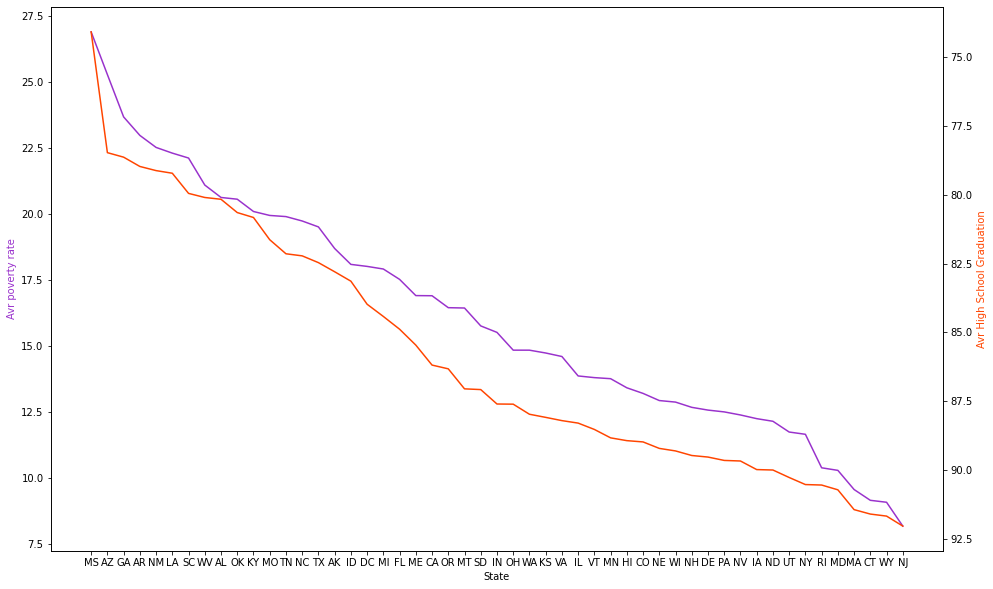

In [40]:
plt.figure(figsize=(16,10))

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(
    df_pct_poverty_by_state['Geographic Area'],
    df_pct_poverty_by_state.poverty_rate,
    color='darkorchid'
)


ax2.plot(
    df_pct_poverty_by_state['Geographic Area'],
    df_pct_completed_hs_state.percent_completed_hs,
    color = 'orangered',
)
ax2.invert_yaxis()
ax1.set_xlabel('State')
ax1.set_ylabel('Avr poverty rate', color='darkorchid')
ax2.set_ylabel('Avr High School Graduation', color='orangered')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

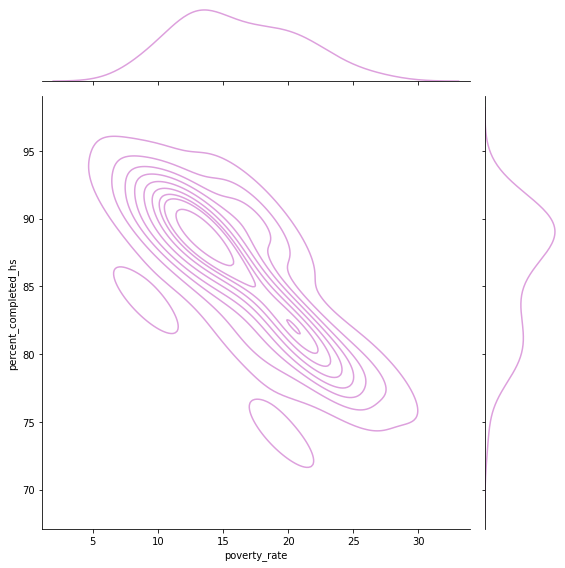

In [41]:
sns.jointplot(
    x = df_pct_poverty_by_state.poverty_rate,
    y = df_pct_completed_hs_state.percent_completed_hs,
    height = 8,
    kind = 'kde',
    color = 'plum'
)

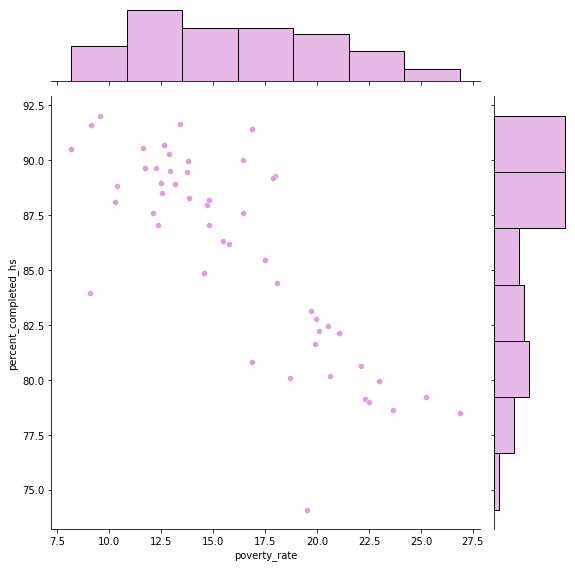

In [42]:
sns.jointplot(
    x = df_pct_poverty_by_state.poverty_rate,
    y = df_pct_completed_hs_state.percent_completed_hs,
    height = 8,
    kind = 'scatter',
    color = 'plum'
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [43]:
hs_poverty_merged = pd.merge(
    df_pct_poverty_by_state, 
    df_pct_completed_hs_state, 
    on='Geographic Area')

hs_poverty_merged

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.27,79.22
2,GA,23.66,78.63
3,AR,22.96,79.95
4,NM,22.51,78.97
5,LA,22.29,79.12
6,SC,22.11,80.65
7,WV,21.08,82.14
8,AL,20.61,80.16
9,OK,20.55,82.46


<Figure size 1600x800 with 0 Axes>

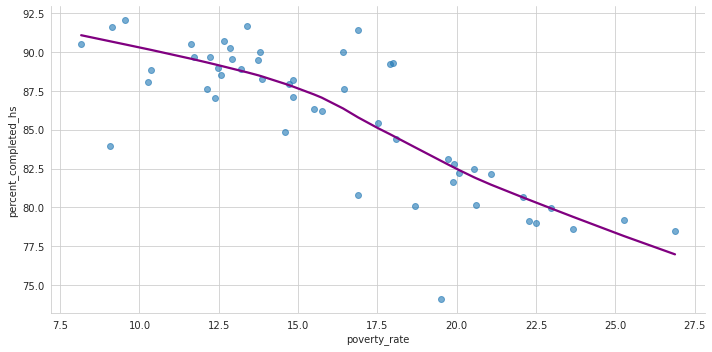

In [44]:
plt.figure(figsize=(8,4), dpi = 200)
with sns.axes_style('whitegrid'):
  sns.lmplot(
      data = hs_poverty_merged,
      x = 'poverty_rate',
      y = 'percent_completed_hs',
      lowess = True,
      aspect=2,
      scatter_kws = {'alpha':0.6},
      line_kws = {'color':'purple'}
    
)

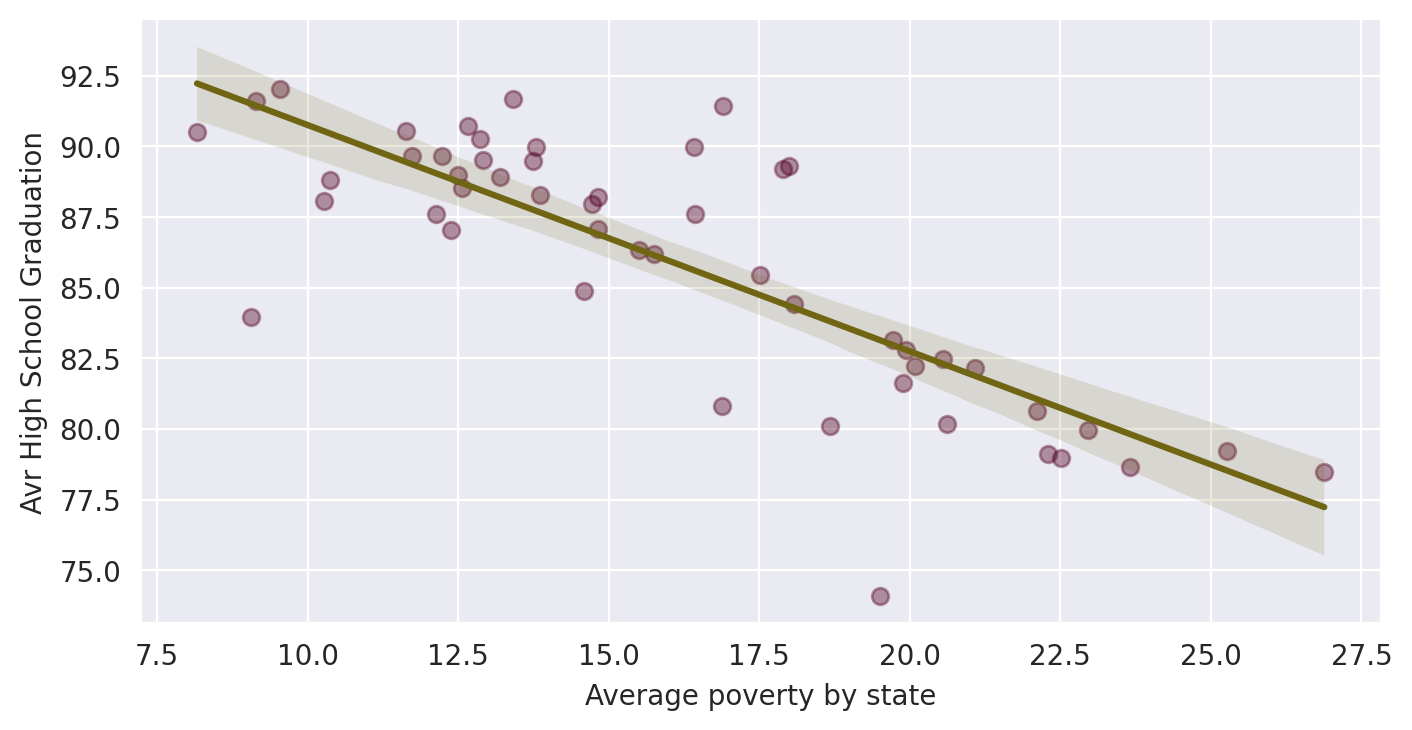

In [45]:
plt.figure(
    figsize=(8,4),
    dpi=200,
)

with sns.axes_style("darkgrid"):
  rg = sns.regplot(
      data = hs_poverty_merged,
      x = 'poverty_rate',
      y = 'percent_completed_hs',
      color = '#520120',
      scatter_kws = {'alpha': 0.4},
      line_kws = {'color': "#706513"}
  )

  rg.set(
      xlabel = 'Average poverty by state',
      ylabel = 'Avr High School Graduation',

  )

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [46]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [47]:
to_del = df_share_race_city[df_share_race_city.share_white == '(X)'].index
df_share_race_city_upd = df_share_race_city.drop(to_del, axis=0)

df_share_race_city_upd = df_share_race_city_upd.astype({'share_white':'float'})
df_share_race_city_upd = df_share_race_city_upd.astype({'share_black':'float'})
df_share_race_city_upd = df_share_race_city_upd.astype({'share_native_american':'float'})
df_share_race_city_upd = df_share_race_city_upd.astype({'share_asian':'float'})
df_share_race_city_upd = df_share_race_city_upd.astype({'share_hispanic':'float'})

In [48]:
df_share_race_city_upd_bystate = df_share_race_city_upd.groupby('Geographic area', as_index = False).agg({'share_white':'mean', 'share_black':'mean', 'share_native_american':'mean', 'share_asian':'mean', 'share_hispanic':'mean'})
df_share_race_city_upd_bystate

fig = px.bar(
    df_share_race_city_upd_bystate, 
    x="Geographic area", 
    y=df_share_race_city_upd_bystate.columns[1:], 
    title="Avrg Racial Makeup of Each US State",
    # color=df_share_race_city_upd_bystate.columns[1:],
    color_continuous_scale='armyrose' 


)
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [49]:
td = df_fatalities[df_fatalities.race.isnull()].index
df_fatalities_upd = df_fatalities.drop(td, axis=0)
df_fatalities_upd

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [50]:
peole_killed_by_race = df_fatalities_upd.value_counts('race')
peole_killed_by_race_chart = px.pie(
    labels = peole_killed_by_race.index,
    values = peole_killed_by_race.values,
    title = 'People Killed by Race',
    names = peole_killed_by_race.index,
    hole = 0.6
)

peole_killed_by_race_chart.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label'
)

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [52]:
peole_killed_by_race = df_fatalities_upd.value_counts('gender')
peole_killed_by_race

gender
M    2242
F      98
dtype: int64

In [57]:
peole_killed_by_race_cart = px.bar(
    x=peole_killed_by_race.index,
    y=peole_killed_by_race.values,
    title = 'Total Number of Deaths of Men and Women',
    color=["#AC44F2", "#5204BF"],
    color_discrete_map="identity"
)

peole_killed_by_race_cart.show()

# fig = px.bar(x=["a","b","c"], y=[1,3,2], color=["red", "goldenrod", "#00D"], color_discrete_map="identity")
# fig.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [61]:
df_fatalities_upd


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [66]:
box = px.box(
    df_fatalities_upd,
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    notched=True,
    points='all',
    title='Age and Manner of Death'
)
box.show()

In [67]:
box = px.box(
    df_fatalities_upd[df_fatalities_upd.gender == 'M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    notched=True,
    points='all',
    title='Age and Manner of Death (for men)'
)
box.show()

In [69]:
box = px.box(
    df_fatalities_upd[df_fatalities_upd.gender == 'F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    points='all',
    title='Age and Manner of Death (for women)'
)
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [77]:
total_fatalities = df_fatalities_upd.armed.count()
unarmed_fatalities = df_fatalities_upd[df_fatalities_upd.armed == 'unarmed'].armed.count()
print(f'Percentage of police killings were people armed: {(unarmed_fatalities/total_fatalities)*100:.3}%')

Percentage of police killings were people armed: 7.28%


In [87]:
carried_weapons = df_fatalities_upd.armed.value_counts()[:20]
carried_weapons_chart = px.bar(
    y = carried_weapons.index,
    x = carried_weapons.values,
    orientation = 'h',
    title = 'Top 20 Carried weapons',
)

carried_weapons_chart.update_layout(
    yaxis={'categoryorder':'total ascending'}
)

carried_weapons_chart.show()

In [91]:
t = ['gun', 'unarmed']

armed_vs_gun = df_fatalities_upd[df_fatalities_upd.armed.isin(t)].armed.value_counts()

armed_vs_gun_chart = px.bar(
    y = armed_vs_gun.index,
    x = armed_vs_gun.values,
    orientation = 'h',
    title = 'Gun vs Unarmed',
)

armed_vs_gun_chart.update_layout(
    yaxis={'categoryorder':'total ascending'}
)

armed_vs_gun_chart.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [97]:
under25_fatalities = df_fatalities_upd[df_fatalities_upd.age <=25 ].age.count()
under25_fatalities
print(f'Percentage of people killed under 25 years old: {(under25_fatalities/total_fatalities)*100:.3}%')

Percentage of people killed under 25 years old: 22.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

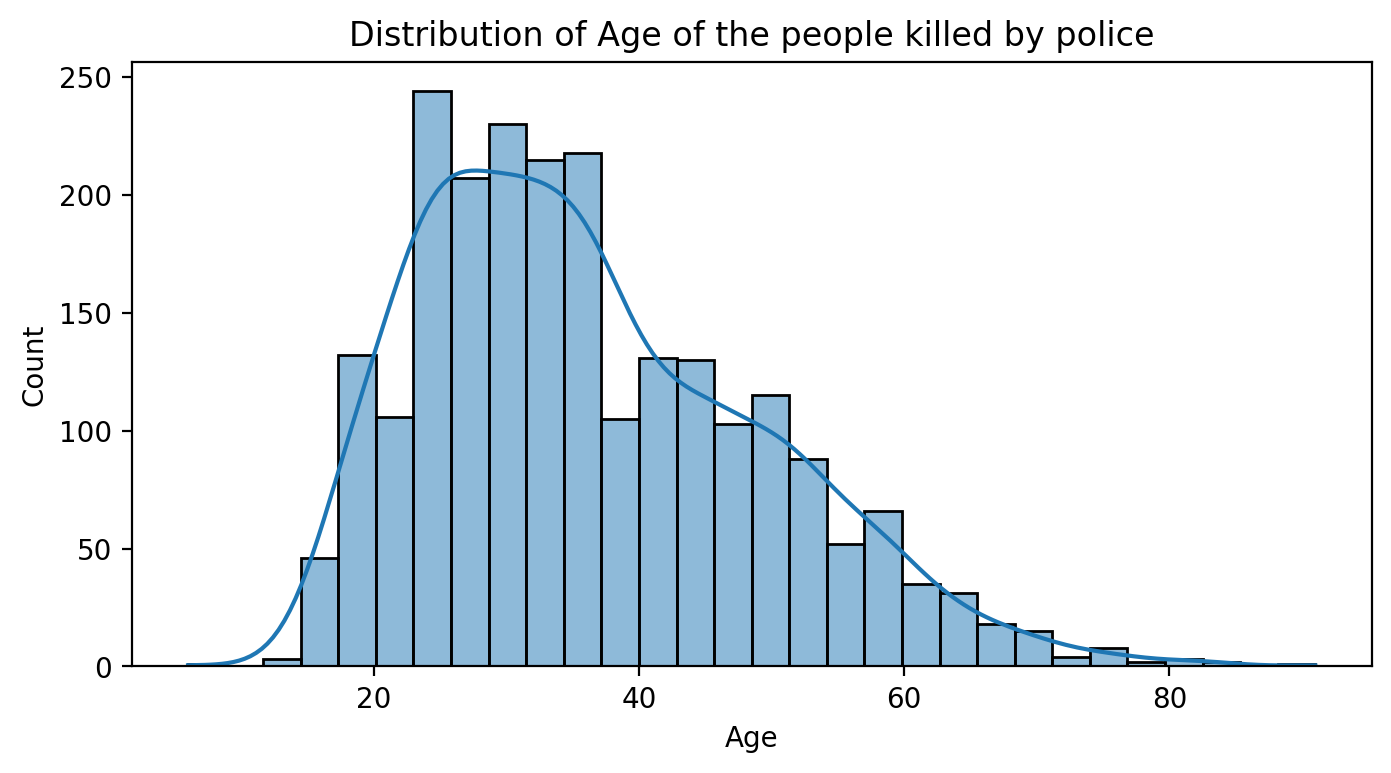

In [100]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(
    data=df_fatalities_upd,
    x=df_fatalities_upd.age,
    kde=True,
    bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age of the people killed by police')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='age', ylabel='Density'>

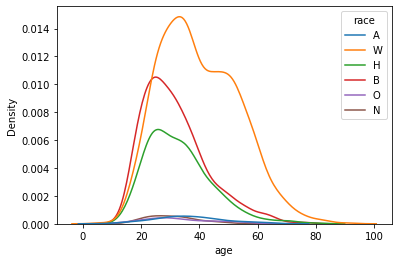

In [106]:
sns.kdeplot(
    data=df_fatalities_upd,
    x=df_fatalities_upd.age,
    hue = df_fatalities_upd.race,
    )

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [108]:
mentally_ill = df_fatalities_upd[df_fatalities_upd.signs_of_mental_illness == True].signs_of_mental_illness.count()


In [109]:
print(f'Percentage of people killed by police have been diagnosed with a mental illness: {(mentally_ill/total_fatalities)*100:.3}%')

Percentage of people killed by police have been diagnosed with a mental illness: 25.1%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [128]:
most_dangerous_cities = df_fatalities_upd.groupby('city', as_index=False).agg({'gender':'count'}).sort_values('gender', ascending=False)[:10]
most_dangerous_cities.rename(columns={"city": "City"}, inplace=True)
most_dangerous_cities

,City,gender
680,Los Angeles,36
924,Phoenix,28
534,Houston,26
220,Chicago,24
1036,San Antonio,18
263,Columbus,18
58,Austin,18
638,Las Vegas,17
749,Miami,17
552,Indianapolis,14


In [121]:
most_dangerous_cities_chart = px.bar(
    y = most_dangerous_cities.city,
    x = most_dangerous_cities.gender,
    orientation = 'h',
    title = 'Top 10 Most dengerous cities',
)

most_dangerous_cities_chart.update_layout(
    yaxis={'categoryorder':'total ascending'}
)

most_dangerous_cities_chart.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [176]:
most_dangerous_states = df_fatalities_upd.groupby('state', as_index=False).agg({'gender':'count'})

In [179]:
most_dangerous_states_graph = px.choropleth(
    most_dangerous_states,
    locationmode="USA-states",
    scope="usa",
    locations = 'state',
    color = 'gender',
    hover_name = 'state',
    color_continuous_scale = px.colors.sequential.Reds,
    labels={'gender':'Police Killings'}
)
most_dangerous_states_graph.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [184]:

df_fatalities_upd.date = pd.to_datetime(df_fatalities_upd.date)

df_fatalities_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2340 non-null   int64         
 1   name                     2340 non-null   object        
 2   date                     2340 non-null   datetime64[ns]
 3   manner_of_death          2340 non-null   object        
 4   armed                    2334 non-null   object        
 5   age                      2311 non-null   float64       
 6   gender                   2340 non-null   object        
 7   race                     2340 non-null   object        
 8   city                     2340 non-null   object        
 9   state                    2340 non-null   object        
 10  signs_of_mental_illness  2340 non-null   bool          
 11  threat_level             2340 non-null   object        
 12  flee                     2288 non-

In [186]:
years = [year.year for year in df_fatalities_upd.date]
months = [month.month for month in df_fatalities_upd.date]

df_fatalities_upd['year'] = years
df_fatalities_upd['mobth'] = months
df_fatalities_upd

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,mobth
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,2
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,2
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015,3
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,4
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,2017-07-26,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False,2017,7
2525,2820,Deltra Henderson,2017-07-27,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,2017,7
2528,2812,Alejandro Alvarado,2017-07-27,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False,2017,7
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017,7


In [231]:
df_fatalities_upd['Period'] = df_fatalities_upd['date'].dt.strftime('%Y-%m')
df_fatalities_upd

GB = df_fatalities_upd.groupby('Period').agg({'gender':'count'}).sort_values(by='Period', ascending=True)
GB

,gender
Period,
2015-01,68
2015-02,77
2015-03,86
2015-04,87
2015-05,84
2015-06,67
2015-07,81
2015-08,84
2015-09,85


(0.0, 35.0)

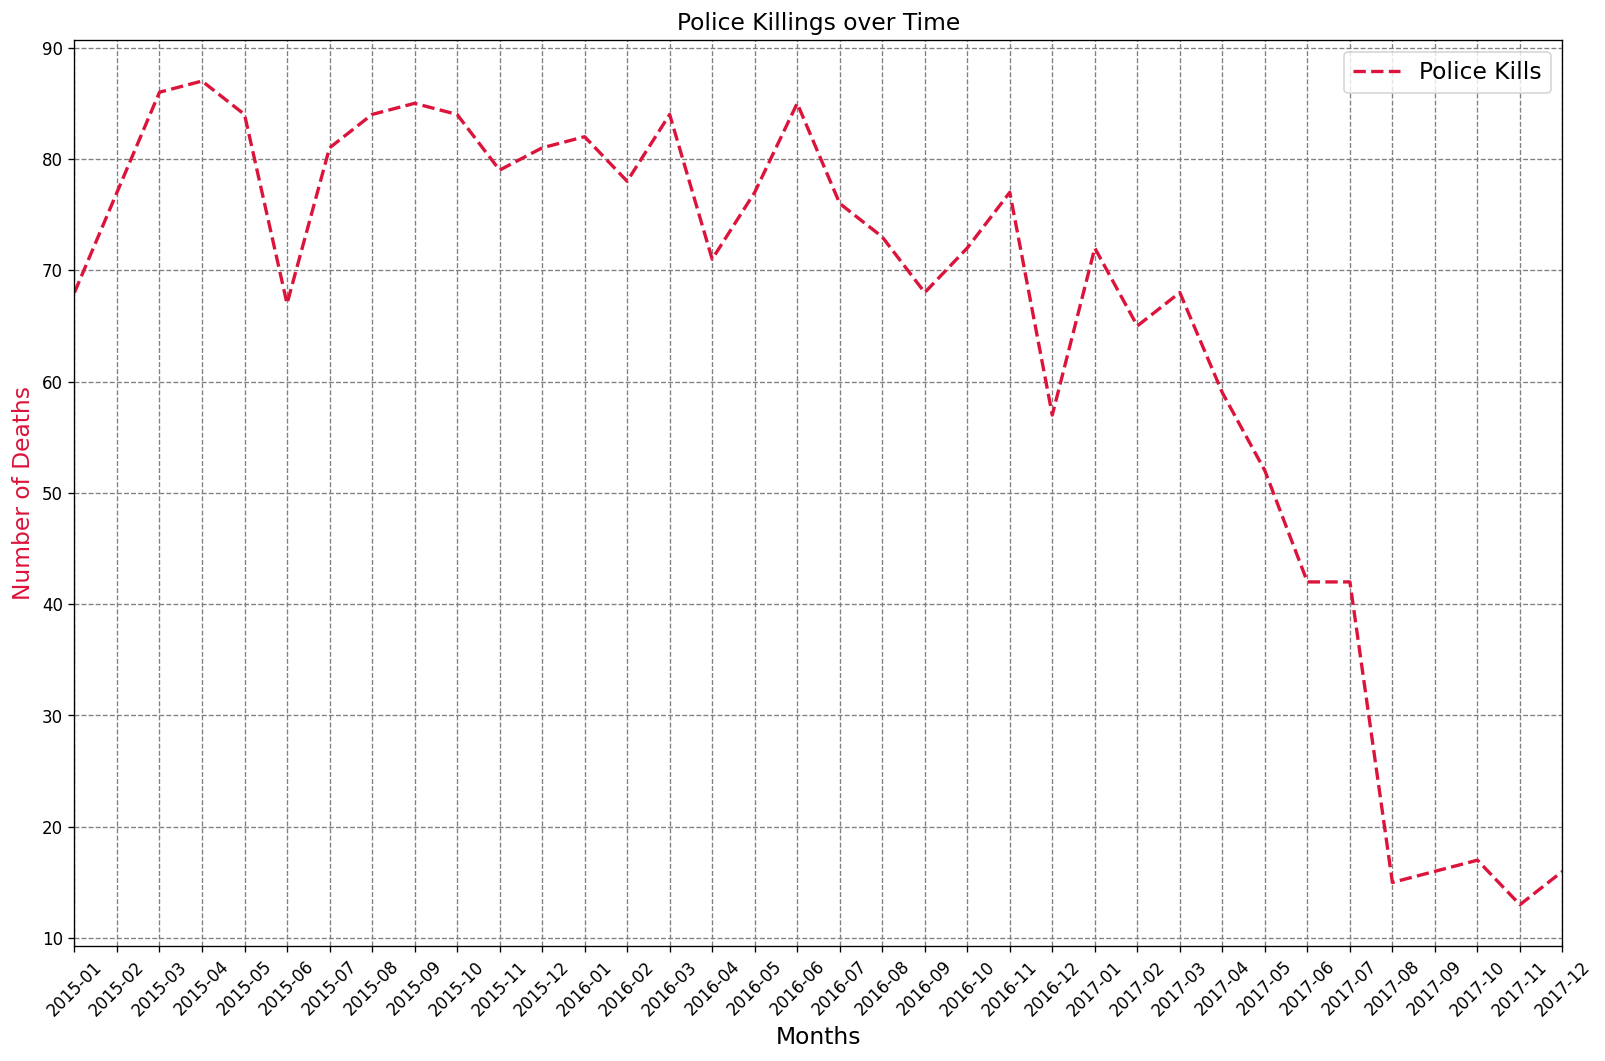

In [234]:
plt.figure(
    figsize = (16,10),
    dpi = 120
)

plt.xticks(rotation=45)

plt.title('Police Killings over Time', fontsize = 14)

plt.grid(
    ls = '--',
    color = 'grey'
)

ax1 = plt.gca()

ax1.plot(
    GB.index,
    GB.values,
    color = 'crimson',
    ls = '--',
    lw = 2,
    label = 'Police Kills' 
)

ax1.legend(fontsize = 14)

ax1.set_xlabel('Months', fontsize = 14)
ax1.set_ylabel('Number of Deaths', fontsize = 14, color = 'crimson')


ax1.set_xlim([GB.index.min(), GB.index.max()])

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).